# Transformada de Fourier Discreta de funções retangulares




Esse notebook tem por objetivo demonstrar e explicar como funcionada a Transformada de Fourier Discreta aplicada para funções retângulares, que são fundamentais no processamento digital de sinais.

Uma função retangular pode ser definida como N amostras contem K valores unitários em sequência, com 1 ≺ K ≼ N, de forma que na forma de frequência, temos:

$X(m) = \sum_{n=-(N/2)+1}^{N/2}x(n)e^{-j2\pi nm/N}$

Além disso, a partir de manipulações matemáticas, temos que:

$X(m) = e^{j(2\pi m/N)(n_o - (K-1)/2)} \frac{sin(\pi mK/N)}{sin(\pi m/N)}$

onde $-n_0$ é o menor valor onde o sinal é 1.

In [84]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

In [87]:
!jupyter nbconvert "Uso_da_FFT_em_python_Exemplo_3.ipynb" --to html

[NbConvertApp] WARNING | pattern 'Uso_da_FFT_em_python_Exemplo_3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=

A título de comparação, vamos utilizar a transformada por meio da equação acima, chamaada equação de Dirichlet, com a transformada obtida por meio do numpy.

Dessa forma, considere um sinal com uma quantidade K = 11 de pulsos contínuos, começando em $-n_0 = 0$ com N = 40 amostras, como demonstra a figura abaixo:

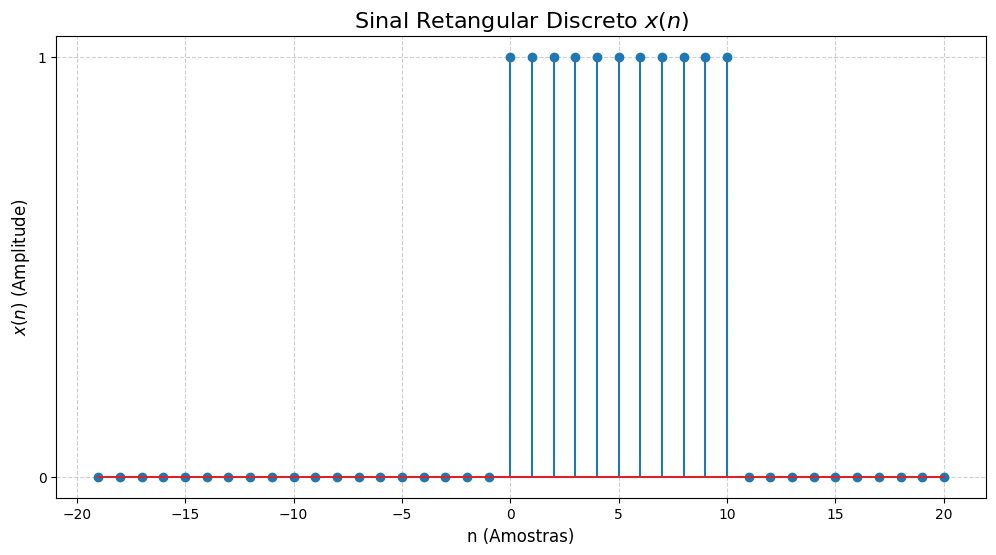

In [ ]:
N = 40  # Número total de amostras
K = 11  # Número de amostras iguais a 1
n0 = 0  # Início das amostras iguais a 1

n_inicio = int(-N/2 + 1)
n_fim = int(N/2)
n = np.arange(n_inicio, n_fim + 1)

# 2. Cria o sinal x(n) inicializado com zeros
x = np.zeros_like(n)

# 3. Define os limites onde o sinal é 1
inicio_pulso = -n0
fim_pulso = -n0 + K - 1

# 4. Define o valor 1 para o intervalo do pulso retangular
# Usamos uma condição lógica para encontrar os índices corretos em 'n'
condicao = (n >= inicio_pulso) & (n <= fim_pulso)
x[condicao] = 1

# --- Plotagem do Gráfico ---

# Configura a figura e os eixos
plt.figure(figsize=(12, 6))

plt.title(f'Sinal Retangular Discreto $x(n)$', fontsize=16)
plt.xlabel('n (Amostras)', fontsize=12)
plt.ylabel('$x(n)$ (Amplitude)', fontsize=12)
plt.stem(n, x)
plt.yticks([0, 1]) # Mostra apenas os ticks 0 e 1 no eixo y
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Em posse desse sinal, vamos comparar os sinais utilizando o numpy e a função de Dirchelet, para entender melhor essa DFT

In [ ]:
# Calcula a DFT usando numpy
X_numpy = np.fft.fft(x)

# Calcula a DFT usando a fórmula de Dirichlet
X_dirichlet = np.zeros(len(n), dtype=complex)
for m in range(N):
    if m % (N / K) == 0 and K != N:
        # Caso especial para evitar divisão por zero
        X_dirichlet[m] = K
    elif m == (N / 2):
        #Caso especial para m = 0
        X_dirichlet[m] = K
    else:
        denominator = np.sin(pi * m / N)
        if denominator == 0:
            # Handle the case where the denominator is zero gracefully
            X_dirichlet[m] = K if m % (N / K) == 0 else 0
        else:
            X_dirichlet[m] = np.exp(1j * (2 * pi * m / N) * (n0 - (K - 1) / 2)) * (np.sin(pi * m * K / N) / denominator)

Como podemos ver abaixo, a magnitude da função nos dois métodos se mantém iguais, com exceção do ponto 0 que será explorado na frente. No entanto, a fase de cada método diferem, devido ao fato da numpy não refletir exatamente os lobos secundários entre os lobos principais da DFT gerada.

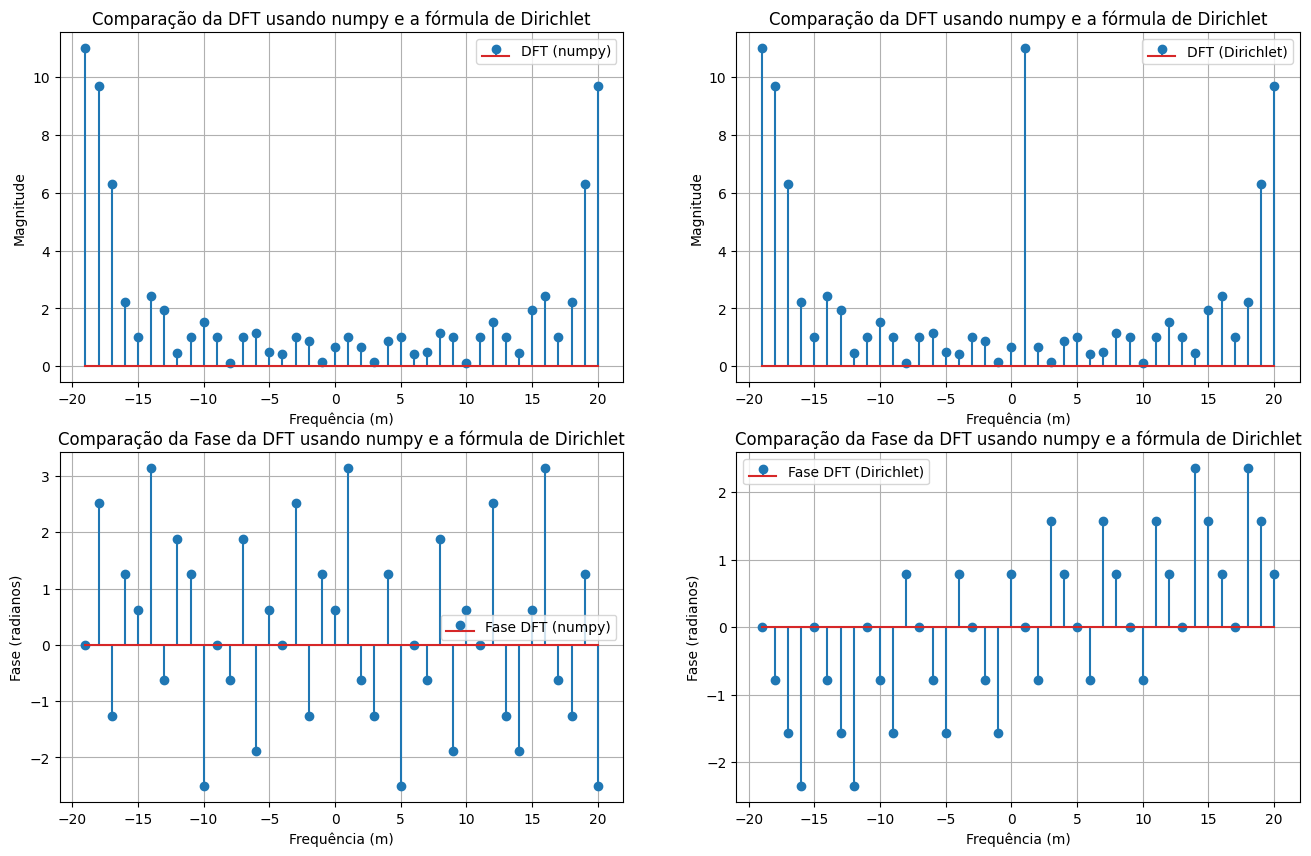

In [ ]:
# Plota o módulo das duas DFTs para comparação
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.stem(n, np.abs(X_numpy), label='DFT (numpy)')
plt.xlabel('Frequência (m)')
plt.ylabel('Magnitude')
plt.title('Comparação da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, np.abs(X_dirichlet), label='DFT (Dirichlet)')
plt.xlabel('Frequência (m)')
plt.ylabel('Magnitude')
plt.title('Comparação da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)

# Plota a fase das duas DFTs para comparação
plt.subplot(2, 2, 3)
plt.stem(n, np.angle(X_numpy), label='Fase DFT (numpy)')
plt.xlabel('Frequência (m)')
plt.ylabel('Fase (radianos)')
plt.title('Comparação da Fase da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(n, np.angle(X_dirichlet), label='Fase DFT (Dirichlet)')
plt.xlabel('Frequência (m)')
plt.ylabel('Fase (radianos)')
plt.title('Comparação da Fase da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)

plt.show()

Por fim, para demonstrar a diferença, podemos ver abaixo os gráficos das duas funções, nos quais os lobos secundários não estão bem representados no numpy, além do fato de que a função apresenta uma descontinuidade no ponto m =0, o que faz ela tender para o valor de amplitude máximo K, assim como ocorre a cada N períodos, mas nesse caso não sendo pela descontinuadade.

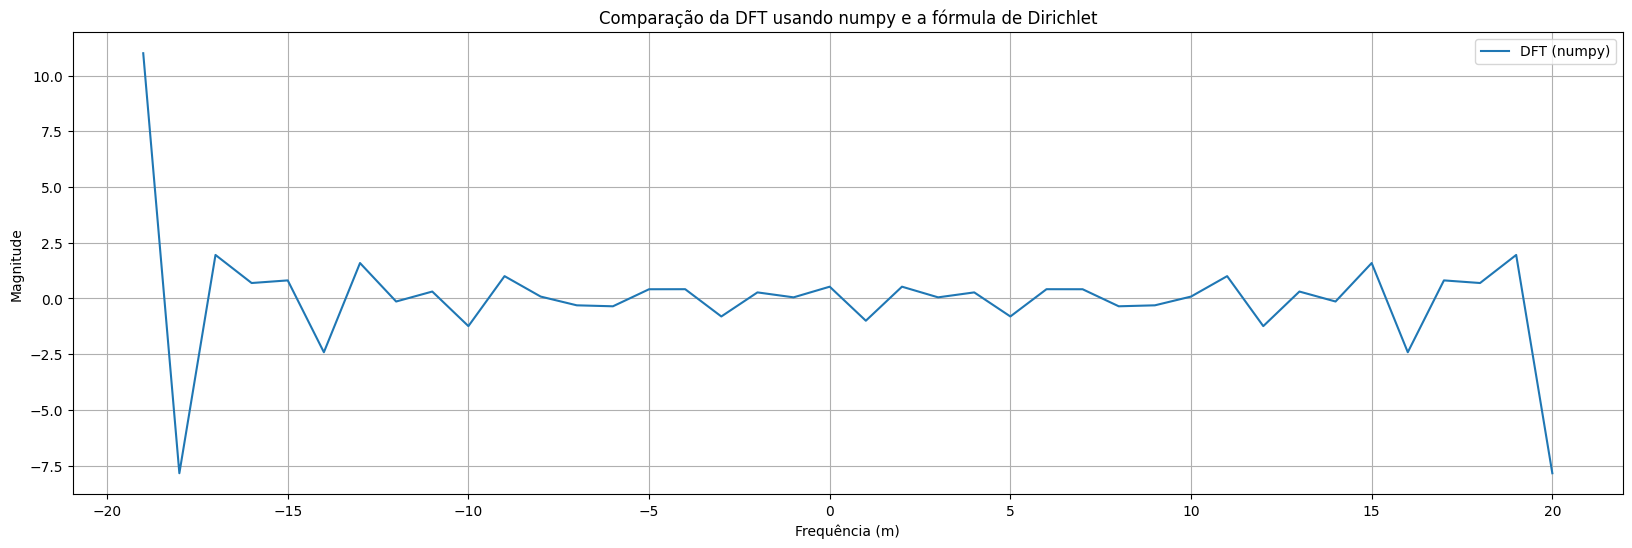

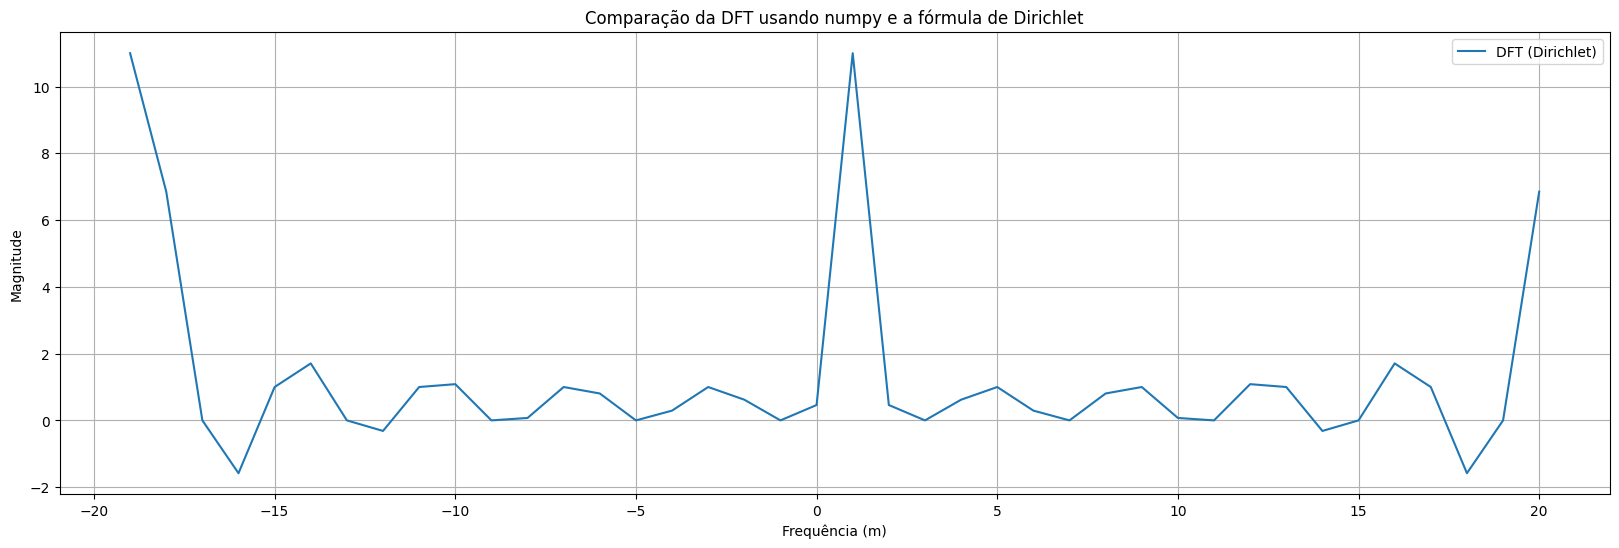

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(n, X_numpy, label='DFT (numpy)')
plt.xlabel('Frequência (m)')
plt.ylabel('Magnitude')
plt.title('Comparação da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(n, X_dirichlet, label='DFT (Dirichlet)')
plt.xlabel('Frequência (m)')
plt.ylabel('Magnitude')
plt.title('Comparação da DFT usando numpy e a fórmula de Dirichlet')
plt.legend()
plt.grid(True)
plt.show()